In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import cv2
import random
import matplotlib.pyplot as plt


In [3]:
def show_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls, x, y, bw, bh = map(float, line.split())

                # YOLO → pixels
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img, "Face", (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

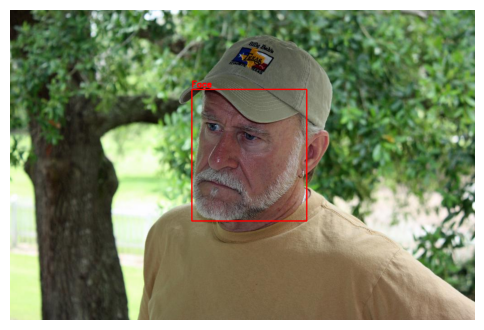

In [4]:
IMG_DIR = "/kaggle/input/face-detection-dataset/images/train"
LBL_DIR = "/kaggle/input/face-detection-dataset/labels/train"

image_name = random.choice(os.listdir(IMG_DIR))

img_path = os.path.join(IMG_DIR, image_name)
label_path = os.path.join(LBL_DIR, image_name.replace(".jpg", ".txt"))

show_image_with_boxes(img_path, label_path)


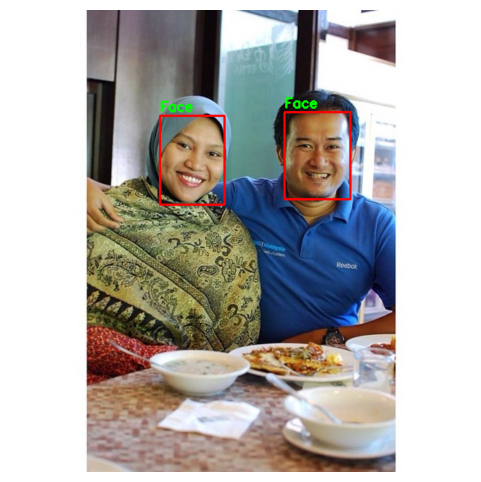

In [9]:
import cv2
import matplotlib.pyplot as plt
import os

# Chemins vers l'image et le label
IMG_PATH = "/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg"
LBL_PATH = "/kaggle/input/face-detection-dataset/labels/train/00006c07d2b033d1.txt"

def show_image_with_boxes(img_path, label_path):
    # Lire l'image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Vérifier si le fichier label existe
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cls, x, y, bw, bh = map(float, line.split())

                # Convertir les coordonnées YOLO en pixels
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                # Dessiner le rectangle bleu vif et plus épais
                cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 4)  # BGR, épaisseur = 4
                cv2.putText(img, "Face", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 3)  # taille 1.0, épaisseur 3

    # Afficher l'image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Appel de la fonction
show_image_with_boxes(IMG_PATH, LBL_PATH)


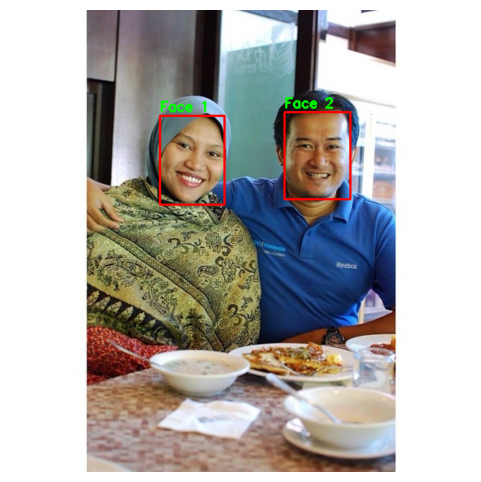

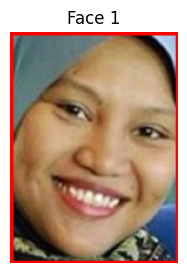

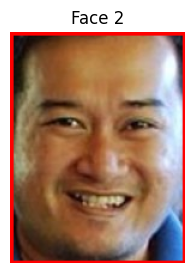

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

# Chemins vers l'image et le label
IMG_PATH = "/kaggle/input/face-detection-dataset/images/train/00006c07d2b033d1.jpg"
LBL_PATH = "/kaggle/input/face-detection-dataset/labels/train/00006c07d2b033d1.txt"

def show_and_segment_faces(img_path, label_path):
    # Lire l'image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    faces = []  # liste pour stocker les visages segmentés

    # Vérifier si le fichier label existe
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for i, line in enumerate(f):
                cls, x, y, bw, bh = map(float, line.split())

                # Convertir les coordonnées YOLO en pixels
                x1 = int((x - bw / 2) * w)
                y1 = int((y - bh / 2) * h)
                x2 = int((x + bw / 2) * w)
                y2 = int((y + bh / 2) * h)

                # Découper le visage
                face = img_rgb[y1:y2, x1:x2]
                faces.append(face)

                # Dessiner le rectangle sur l'image originale
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255,0,0), 4)
                cv2.putText(img_rgb, f"Face {i+1}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 3)

    # Afficher l'image originale avec rectangles
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    # Afficher les visages segmentés individuellement
    for i, face in enumerate(faces):
        plt.figure(figsize=(3,3))
        plt.imshow(face)
        plt.title(f"Face {i+1}")
        plt.axis("off")
        plt.show()

# Appel de la fonction
show_and_segment_faces(IMG_PATH, LBL_PATH)


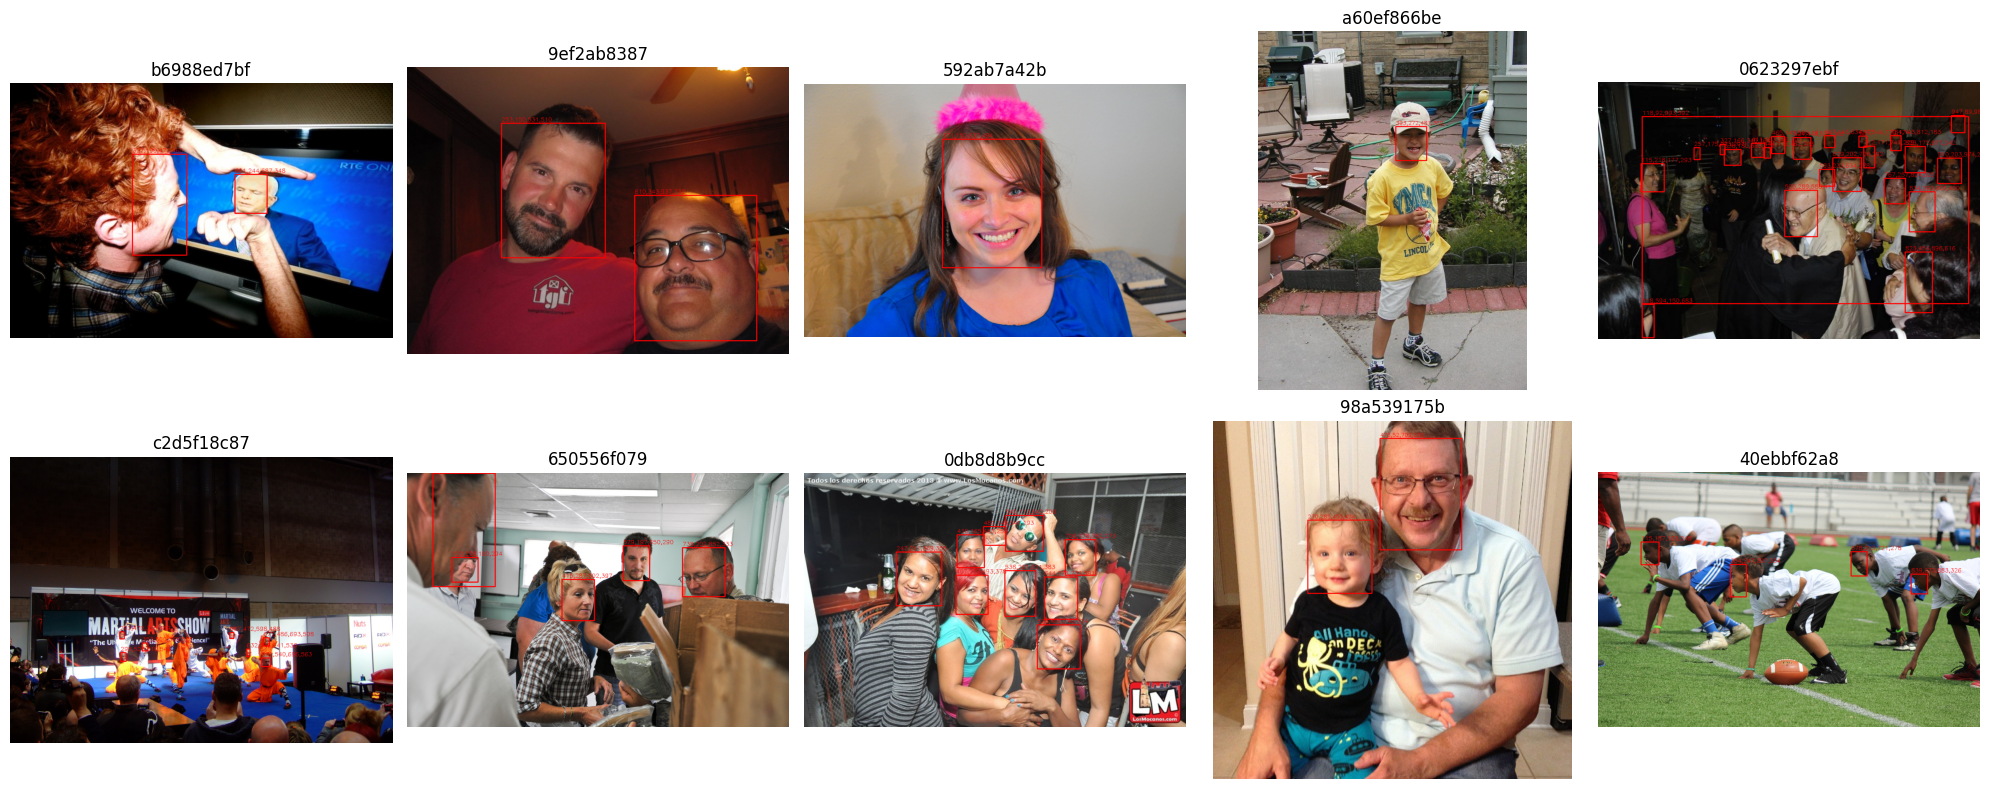

In [2]:
import cv2
import matplotlib.pyplot as plt
import os
import random

IMG_DIR = "/kaggle/input/face-detection-dataset/images/train"
LBL_DIR = "/kaggle/input/face-detection-dataset/labels/train"

# Filtrer les fichiers image valides
images = [f for f in os.listdir(IMG_DIR) if f.endswith((".jpg", ".png", ".jpeg"))]

# Sélectionner 10 images aléatoires
sample_images = random.sample(images, 10)

# Créer une figure avec 2 lignes x 5 colonnes
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for ax, img_name in zip(axes, sample_images):
    img_path = os.path.join(IMG_DIR, img_name)
    label_path = os.path.join(LBL_DIR, os.path.splitext(img_name)[0] + ".txt")

    # Lire l'image
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ Impossible de lire {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Lire les labels YOLO
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            yolo_labels = []
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                yolo_labels.append([float(p) for p in parts])

        # Dessiner les boîtes rouges et coordonnées
        for label in yolo_labels:
            cls, x_center, y_center, bw, bh = label
            x1 = int((x_center - bw/2) * w)
            y1 = int((y_center - bh/2) * h)
            x2 = int((x_center + bw/2) * w)
            y2 = int((y_center + bh/2) * h)

            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
            coord_text = f"{x1},{y1},{x2},{y2}"
            cv2.putText(img, coord_text, (x1, max(y1-5,0)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)

    # Afficher l'image dans le subplot
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(img_name[:10])  # affiche une partie du nom de l'image

plt.tight_layout()
plt.show()

Installation de YOLOv8

In [6]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00a 0:00:01


Définir le fichier YAML pour YOLOv8

In [7]:
dataset_yaml = """
train: /kaggle/input/face-detection-dataset/images/train
val: /kaggle/input/face-detection-dataset/images/val  # créer si besoin
nc: 1
names: ['face']
"""

with open("face_dataset.yaml", "w") as f:
    f.write(dataset_yaml)


Entraîner YOLOv8

In [8]:
import torch
print("CUDA disponible :", torch.cuda.is_available())
print("Nombre de GPU :", torch.cuda.device_count())
print("Nom du GPU :", torch.cuda.get_device_name(0))

CUDA disponible : True
Nombre de GPU : 2
Nom du GPU : Tesla T4


In [9]:
from ultralytics import YOLO

# Créer le modèle (détection)
model = YOLO("yolov8n.pt")  # "n" = nano, rapide pour test

# Lancer l'entraînement
model.train(
    data="face_dataset.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,       # GPU si disponible
    name="yolo_face_detection"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.246 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=face_dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e7c042891c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Étape 2 — Afficher les courbes automatiquement (le plus rapide)

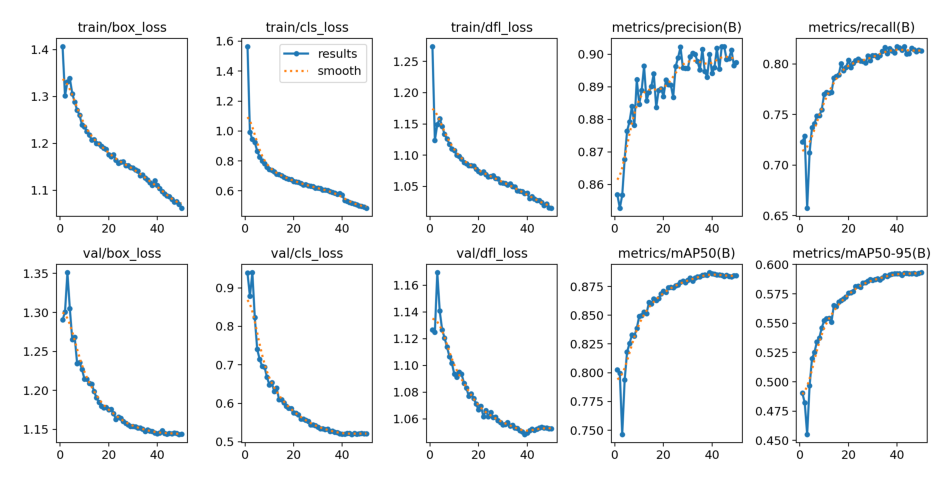

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("runs/detect/yolo_face_detection/results.png")

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis("off")
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/yolo_face_detection/results.csv")
print(df.columns)


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


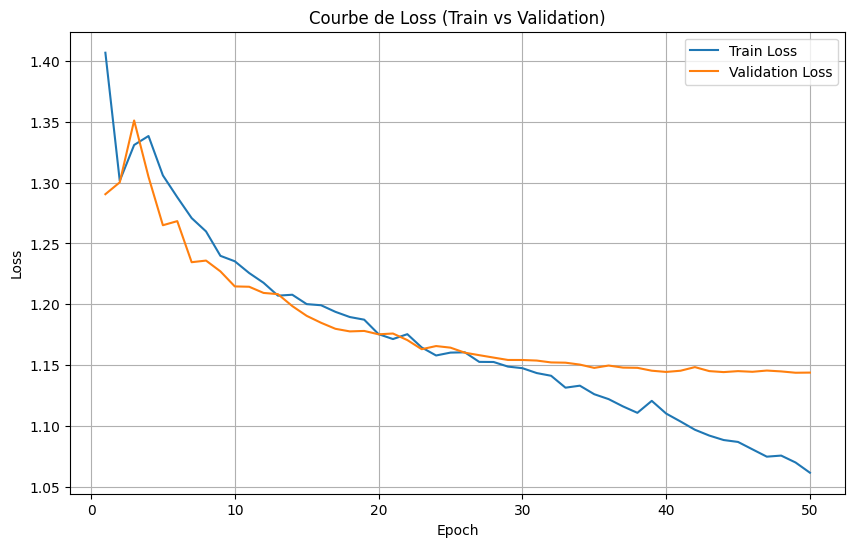

In [14]:
plt.figure(figsize=(10,6))

plt.plot(df["epoch"], df["train/box_loss"], label="Train Loss")
plt.plot(df["epoch"], df["val/box_loss"], label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Courbe de Loss (Train vs Validation)")
plt.legend()
plt.grid()
plt.show()


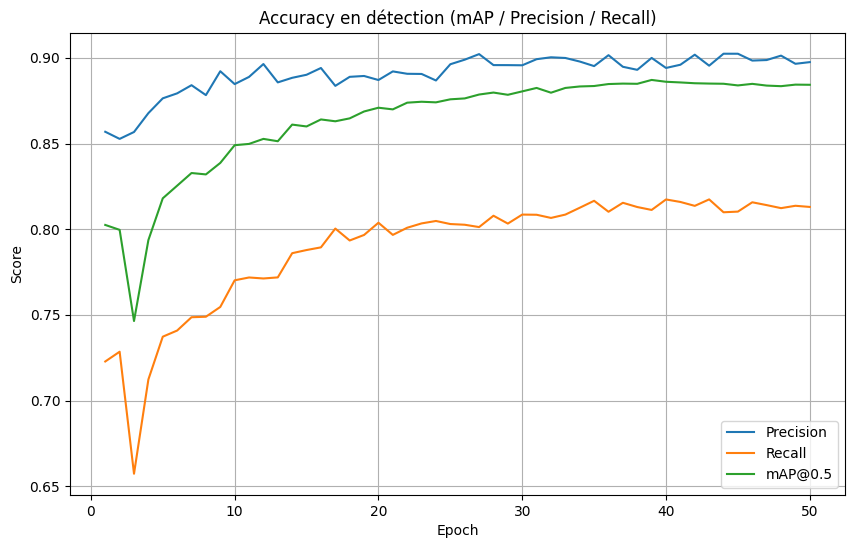

In [15]:
plt.figure(figsize=(10,6))

plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Accuracy en détection (mAP / Precision / Recall)")
plt.legend()
plt.grid()
plt.show()



image 1/1 /kaggle/input/face-detection-dataset/images/val/0003d5dfa8f0dd41.jpg: 384x640 3 faces, 7.2ms
Speed: 2.0ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


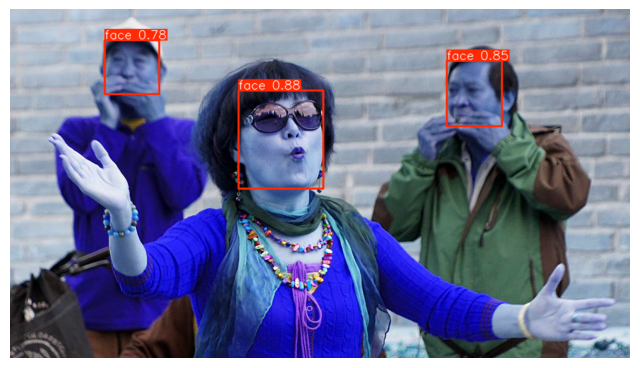

🔍 Faces détectées :
Face 1:
  ➤ Confidence : 0.88
  ➤ Box (x1,y1,x2,y2) : 377, 134, 517, 296
Face 2:
  ➤ Confidence : 0.85
  ➤ Box (x1,y1,x2,y2) : 721, 85, 812, 193
Face 3:
  ➤ Confidence : 0.78
  ➤ Box (x1,y1,x2,y2) : 156, 51, 246, 140


In [16]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# ==============================
# 1️⃣ Charger le meilleur modèle
# ==============================
model = YOLO("/kaggle/working/runs/detect/yolo_face_detection/weights/best.pt")

# ==============================
# 2️⃣ Image à tester
# ==============================
img_path = "/kaggle/input/face-detection-dataset/images/val/0003d5dfa8f0dd41.jpg"

# ==============================
# 3️⃣ Détection
# ==============================
results = model(img_path)

# ==============================
# 4️⃣ Affichage du résultat
# ==============================
img_result = results[0].plot()  # image avec bounding boxes

plt.figure(figsize=(8,8))
plt.imshow(img_result)
plt.axis("off")
plt.show()

# ==============================
# 5️⃣ Afficher les détails des visages détectés
# ==============================
print("🔍 Faces détectées :")

for i, box in enumerate(results[0].boxes):
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = float(box.conf)
    
    print(f"Face {i+1}:")
    print(f"  ➤ Confidence : {conf:.2f}")
    print(f"  ➤ Box (x1,y1,x2,y2) : {int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}")



image 1/1 /kaggle/working/portrait-de-deux-joyeuses-belles-amies-assises-dans-un-café-à-lintérieur-regardant-le.jpg: 448x640 2 faces, 38.6ms
Speed: 2.4ms preprocess, 38.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


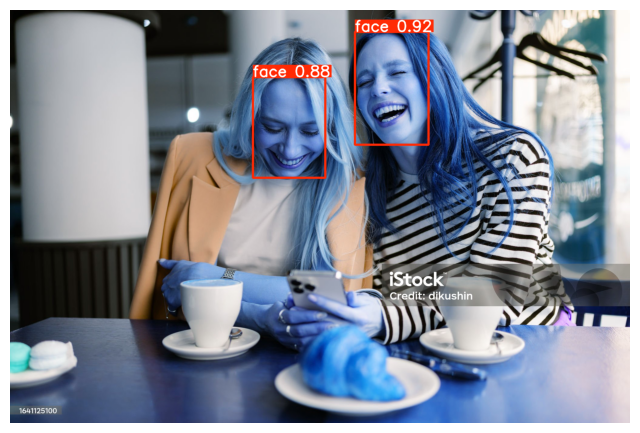

🔍 Faces détectées :
Face 1:
  ➤ Confidence : 0.92
  ➤ Box (x1,y1,x2,y2) : 1139, 75, 1382, 447
Face 2:
  ➤ Confidence : 0.88
  ➤ Box (x1,y1,x2,y2) : 802, 224, 1041, 556


In [17]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# ==============================
# 1️⃣ Charger le meilleur modèle
# ==============================
model = YOLO("/kaggle/working/runs/detect/yolo_face_detection/weights/best.pt")

# ==============================
# 2️⃣ Image à tester
# ==============================
img_path = "https://media.istockphoto.com/id/1641125100/fr/photo/portrait-de-deux-joyeuses-belles-amies-assises-dans-un-caf%C3%A9-%C3%A0-lint%C3%A9rieur-regardant-le.jpg?s=2048x2048&w=is&k=20&c=3OzRIzELHJ29xdkQmtYX-FriJ5PuNM-OOer-QLBHeCU="

# ==============================
# 3️⃣ Détection
# ==============================
results = model(img_path)

# ==============================
# 4️⃣ Affichage du résultat
# ==============================
img_result = results[0].plot()  # image avec bounding boxes

plt.figure(figsize=(8,8))
plt.imshow(img_result)
plt.axis("off")
plt.show()

# ==============================
# 5️⃣ Afficher les détails des visages détectés
# ==============================
print("🔍 Faces détectées :")

for i, box in enumerate(results[0].boxes):
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    conf = float(box.conf)
    
    print(f"Face {i+1}:")
    print(f"  ➤ Confidence : {conf:.2f}")
    print(f"  ➤ Box (x1,y1,x2,y2) : {int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}")



image 1/1 /kaggle/input/afwdataset/4538917191_8.jpg: 384x640 32 faces, 6.5ms
Speed: 2.3ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /kaggle/input/afwdataset/5144909700_1.jpg: 640x448 4 faces, 39.1ms
Speed: 2.5ms preprocess, 39.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 /kaggle/input/afwdataset/3284354538_2.jpg: 480x640 3 faces, 7.3ms
Speed: 2.7ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /kaggle/input/afwdataset/5106695994_3.jpg: 416x640 6 faces, 39.8ms
Speed: 2.6ms preprocess, 39.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/afwdataset/2406586388_2.jpg: 448x640 3 faces, 6.9ms
Speed: 2.5ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /kaggle/input/afwdataset/4285163979_1.jpg: 448x640 10 faces, 6.5ms
Speed: 2.7ms preprocess, 6.5ms inference, 1.4ms post

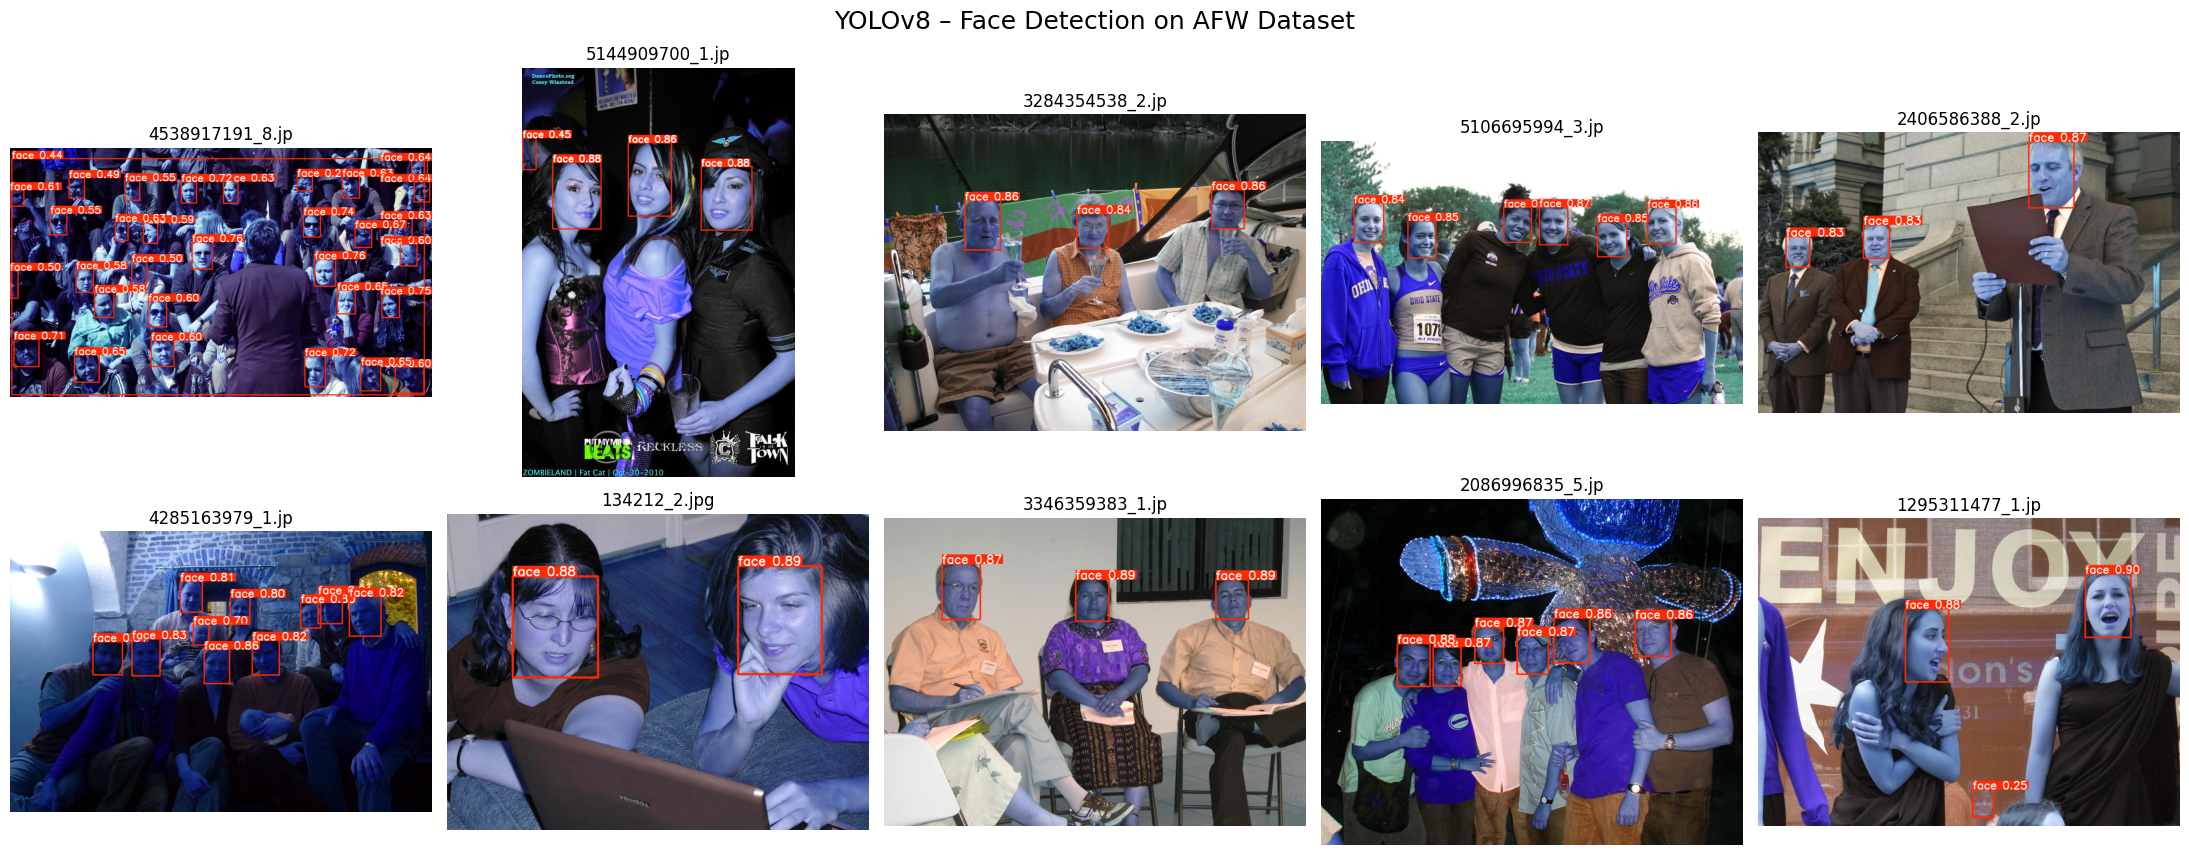

In [19]:
from ultralytics import YOLO
import os
import random
import matplotlib.pyplot as plt
import cv2

# ==============================
# 1️⃣ Charger le modèle entraîné
# ==============================
model = YOLO("/kaggle/working/runs/detect/yolo_face_detection/weights/best.pt")

# ==============================
# 2️⃣ Dossier AFW
# ==============================
AFW_DIR = "/kaggle/input/afwdataset"

# Récupérer toutes les images
images = [f for f in os.listdir(AFW_DIR) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

# Sélectionner 10 images aléatoires
sample_images = random.sample(images, 10)

# ==============================
# 3️⃣ Créer la figure 2 lignes x 5 colonnes
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(22, 9))
axes = axes.flatten()

# ==============================
# 4️⃣ Détection + affichage
# ==============================
for ax, img_name in zip(axes, sample_images):
    img_path = os.path.join(AFW_DIR, img_name)

    # Détection
    results = model(img_path)

    # Image avec bounding boxes
    img_result = results[0].plot()

    # Affichage
    ax.imshow(img_result)
    ax.set_title(img_name[:15])
    ax.axis("off")

plt.suptitle("YOLOv8 – Face Detection on AFW Dataset", fontsize=18)
plt.tight_layout()
plt.show()
